# Part I - (Ford GoBike System Data)
## by (Navya)

## Introduction
> This data set includes information about 183412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df_bike=pd.read_csv('bikedata.csv')

In [3]:
df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
df_bike.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

In [6]:
df_bike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Now, we have to drop all the missing values from start_station_id,start_station_name,end_station_name,end_station_id, member_birth_year and member_gender.

In [7]:
df_bike.dropna(inplace=True)

In [8]:
df_bike.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [9]:
df_bike.shape

(174952, 16)

Convert the start_time and end_time to datetime datatype and bike_id to string.

In [10]:
df_bike['start_time']=pd.to_datetime(df_bike['start_time'])

In [11]:
df_bike['end_time']=pd.to_datetime(df_bike['end_time'])

In [12]:
df_bike['bike_id']=df_bike['bike_id'].astype(str)

In [13]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(7), int64(1), object(6)
memory u

Extract the day,month,year and hour columns from the start_time and end_time columns.

In [14]:
import datetime as dt
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
df_bike['start_year'] = df_bike['start_time'].dt.year
df_bike['start_hr'] = df_bike['start_time'].dt.hour
df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()
df_bike['end_year'] = df_bike['end_time'].dt.year
df_bike['end_hr'] = df_bike['end_time'].dt.hour

df_bike.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_day,start_month,start_year,start_hr,end_day,end_month,end_year,end_hr
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Male,No,Thursday,February,2019,17,Friday,March,2019,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,Thursday,February,2019,12,Friday,March,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Other,No,Thursday,February,2019,17,Friday,March,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Male,Yes,Thursday,February,2019,23,Friday,March,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,...,Female,No,Thursday,February,2019,23,Friday,March,2019,0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,...,Other,No,Thursday,February,2019,23,Friday,March,2019,0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,...,Male,No,Thursday,February,2019,23,Friday,March,2019,0
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Female,Yes,Thursday,February,2019,23,Friday,March,2019,0


In [15]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 24 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_month      

In [16]:
print(df_bike['start_year'].value_counts())
print('*'*10)
print(df_bike['end_year'].value_counts())

2019    174952
Name: start_year, dtype: int64
**********
2019    174952
Name: end_year, dtype: int64


### What is the structure of your dataset?

> The dataset originally contains 183412 rows and 16 columns. After wrangling and cleaning the dataset,it now contains 174952 rows and 24 columns.The columns include start time,start station and their coordinates,end time,end station and their coordinates,bike id,user type etc.

### What is/are the main feature(s) of interest in your dataset?

> My main features of interest are duration and at what hour,day,month of the year most trips are made.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The start_day,start_month,start_hour and the same variables with end label will support my investigation.

## Univariate Exploration



### Ride frequency by days of the week

Text(0.5,1,'Frequency of bike rides based on end day of the week')

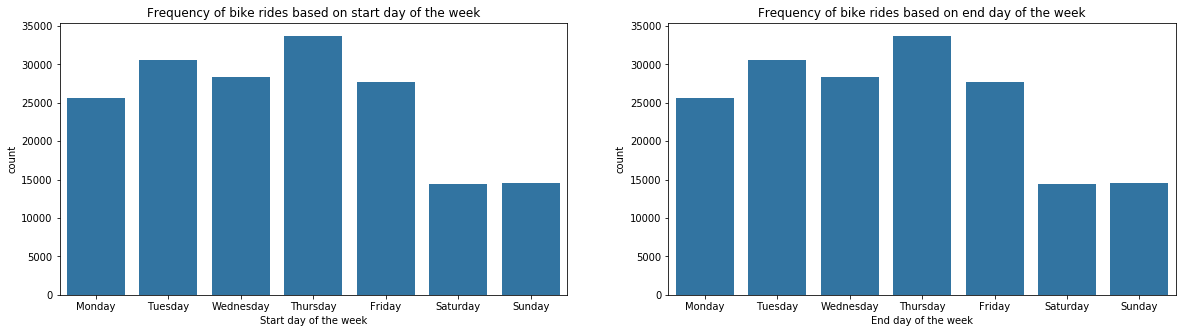

In [17]:
plt.figure(figsize=[20,5])
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
base_color=sb.color_palette()[0]
plt.subplot(1,2,1)
sb.countplot(data=df_bike,x='start_day',color=base_color,order=days_order);
plt.xlabel('Start day of the week')
plt.title('Frequency of bike rides based on start day of the week')
plt.subplot(1,2,2)
sb.countplot(data=df_bike,x='end_day',color=base_color,order=days_order);
plt.xlabel('End day of the week')
plt.title('Frequency of bike rides based on end day of the week')

#### Most trips happened on Thursday and least trips happened on weekends.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Ride frequency by months of the year

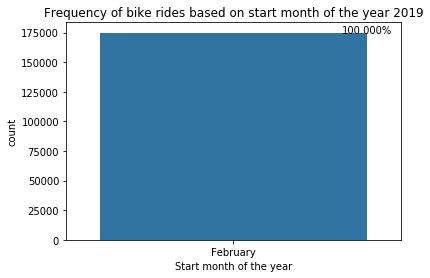

In [18]:
base_color=sb.color_palette()[0]
ax=sb.countplot(data=df_bike,x='start_month',color=base_color,hue_order=df_bike.end_month.value_counts().index);
plt.xlabel('Start month of the year')
plt.title('Frequency of bike rides based on start month of the year 2019')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/174952)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha='center')

  

In [19]:
df_bike['end_month'].value_counts().index

Index(['February', 'March'], dtype='object')

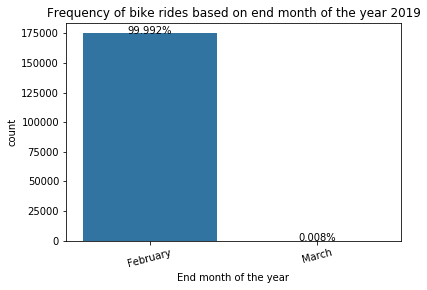

In [20]:
base_color=sb.color_palette()[0]
order=df_bike['end_month'].value_counts(ascending=False).index
ax=sb.countplot(data=df_bike,x='end_month',color=base_color,order=order);
plt.xlabel('End month of the year')
plt.title('Frequency of bike rides based on end month of the year 2019')
plt.xticks(rotation=15)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/174952)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha='center')
plt.show();
  

#### Most of the trips started in February and ended in February with a few trips (negligible amount) ending in March.

### Ride frequency by hours of day

Text(0.5,1,'Frequency of bike rides based on end hour of the day')

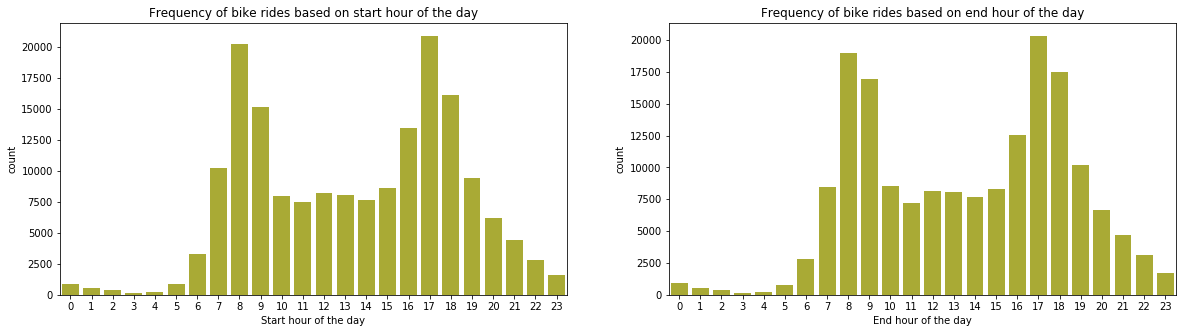

In [21]:
plt.figure(figsize=[20,5])
base_color=sb.color_palette()[8]
plt.subplot(1,2,1)
sb.countplot(data=df_bike,x='start_hr',color=base_color);
plt.xlabel('Start hour of the day')
plt.title('Frequency of bike rides based on start hour of the day')
plt.subplot(1,2,2)
sb.countplot(data=df_bike,x='end_hr',color=base_color);
plt.xlabel('End hour of the day')
plt.title('Frequency of bike rides based on end hour of the day')

#### The 8th,9th,17th and 18th hours have the highest number of trips. The 3rd,4th trips have the least number of trips. This clearly tells there are high number of rides during the opening office hours and closing office hours.

### Average Trip duration

Text(0.5,1,'Average duration of the trip')

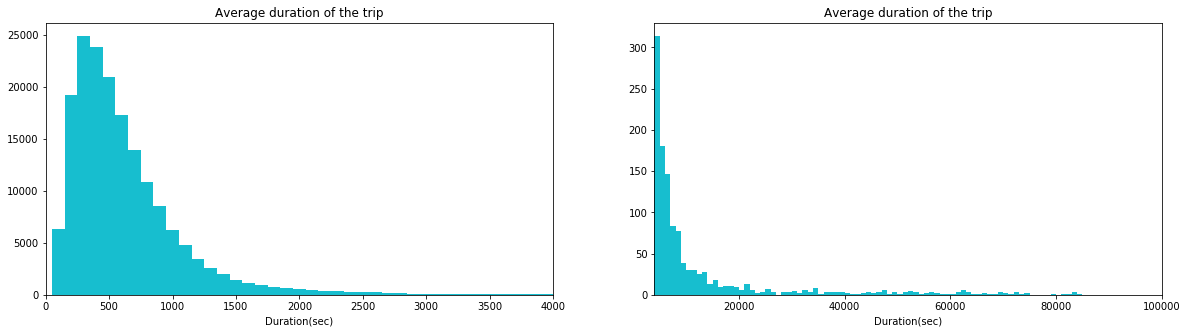

In [22]:
plt.figure(figsize=[20,5])
base_color=sb.color_palette()[9]
plt.subplot(1,2,1)
bins=np.arange(50,df_bike['duration_sec'].max()+100,100)
plt.hist(data=df_bike,x='duration_sec',color=base_color,bins=bins);
plt.xlim([0,4000])
plt.xlabel('Duration(sec)')
plt.title('Average duration of the trip')
plt.subplot(1,2,2)
bins=np.arange(4000,df_bike['duration_sec'].max()+1000,1000)
plt.hist(data=df_bike,x='duration_sec',color=base_color,bins=bins);
plt.xlim([4000,100000])
plt.xlabel('Duration(sec)')
plt.title('Average duration of the trip')

Since, we have a long tail distribution we need to use log values on x axis which means we have to apply transformations.

In [23]:
np.log10(df_bike['duration_sec'].describe())

count    5.242919
mean     2.847574
std      3.215427
min      1.785330
25%      2.509203
50%      2.707570
75%      2.897077
max      4.927103
Name: duration_sec, dtype: float64

Text(0.5,1,'Average duration of the trip')

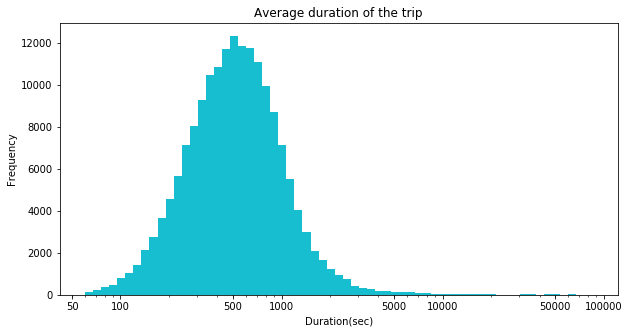

In [24]:
plt.figure(figsize=[10,5])
bins=10** np.arange(1.78,np.log10(df_bike['duration_sec'].max())+0.05,0.05)
ticks=[50,100,500,1000,5000,10000,50000,100000]
plt.hist(data=df_bike,x='duration_sec',color=base_color,bins=bins);
plt.xscale('log')
plt.xticks(ticks,ticks)
plt.xlabel('Duration(sec)')
plt.ylabel('Frequency')
plt.title('Average duration of the trip')

#### From the graph, we can conclude that there are highest number of trips around 500sec duration followed by more number of trips between 300 to 1000sec with a smooth falling curve till 10000sec.There are very few trips with highest duration above 10000sec.

### Ride frequency based on user type

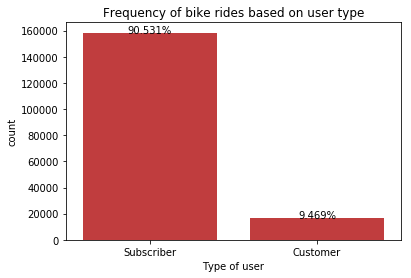

In [25]:
base_color=sb.color_palette()[3]
ax=sb.countplot(data=df_bike,x='user_type',color=base_color,order=df_bike.user_type.value_counts().index);
plt.xlabel('Type of user')
plt.title('Frequency of bike rides based on user type')
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/174952)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(percentage,(x,y),ha='center')
plt.show()

#### Most number of rides(90%) are by Subscriber users and only 10% of rides are by customers.

### Frequency of bike rides based on age

In [26]:
df_bike['age']=2019 - df_bike['member_birth_year']

In [27]:
df_bike['age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: age, dtype: float64

Text(0.5,1,'Frequency of bike rides based on age')

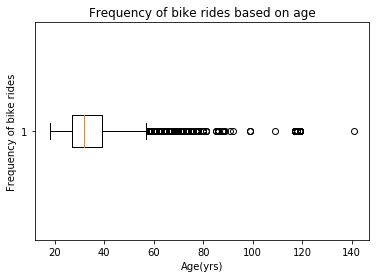

In [28]:
plt.boxplot(df_bike['age'],vert=False);
plt.xlabel('Age(yrs)')
plt.ylabel('Frequency of bike rides')
plt.title('Frequency of bike rides based on age')

#### The above plot says most of the bike rides are done by 20 to 40 years old people and they have got many outliers with the highest one being >140 years old.

### Frequency of bike rides based on gender

Text(0.5,1,'Frequency of bike rides based on gender')

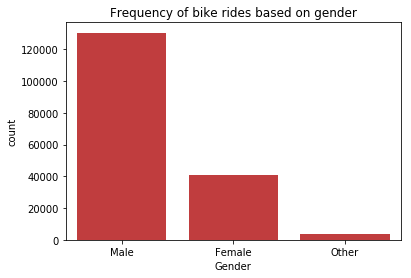

In [29]:
base_color=sb.color_palette()[3]
sb.countplot(data=df_bike,x='member_gender',color=base_color,order=['Male','Female','Other']);
plt.xlabel('Gender')
plt.title('Frequency of bike rides based on gender')

#### From the above bar chart, males have highest number of bike rides followed by females and others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Frequency of bike rides based on start hour and end hour of the day are bi modal disributions and the average trip duration graph is a right skewed distribution.In the average trip duration there was a long tail on the highest duration end so we have to apply log scales and transformations to perform the analysis.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Apart from the average duration of the trip graph, all were usual distributions but in the case of analysing frequency of bike rides by the end month we are unable to represent a very minimal amount of rides in the month of March so we need to apply annotation in terms of percentage of bike rides to notify that small amount of bike rides in the month of March.

## Bivariate Exploration


### What is the average duration of trip based on user type?

Text(0.5,1,'Duration of the trip for various user tpes')

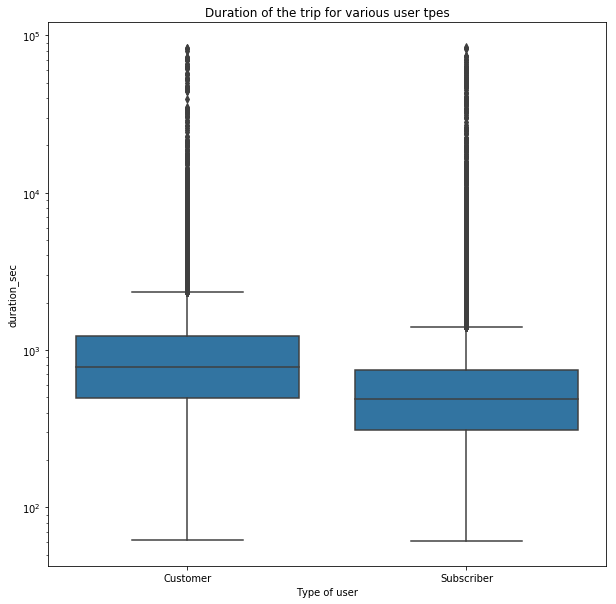

In [30]:
plt.figure(figsize=[10,10])
base_color=sb.color_palette()[0]
ticks=[100,1000,10000,100000]
sb.boxplot(data=df_bike,x='user_type',y='duration_sec',color=base_color);
plt.yticks(ticks,ticks)
plt.yscale('log')
plt.xlabel('Type of user')
plt.title('Duration of the trip for various user tpes')

#### From the above graph, 'Customer' type users with 800sec have higher average trip duration than 'Subscriber' type users around 450sec.

### What is the average duration of trip based on gender?

Text(0.5,1,'Duration of the trip based on gender')

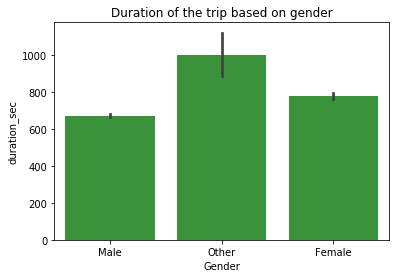

In [31]:
base_color=sb.color_palette()[2]
sb.barplot(data=df_bike,x='member_gender',y='duration_sec',color=base_color);
plt.xlabel('Gender')
plt.title('Duration of the trip based on gender')


#### The shortest trip is by males and the longest trips are by others.

### Distribution of trip durations across all days of a week

Text(0.5,1,'Duration of the trip for end days')

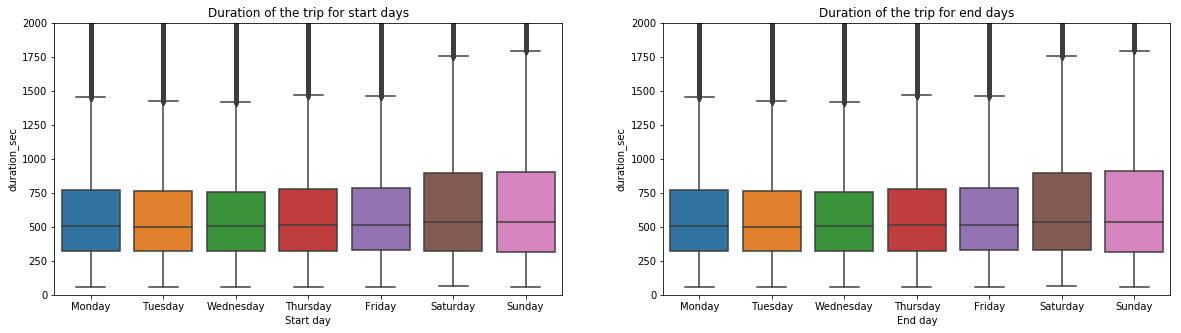

In [32]:
plt.figure(figsize=[20,5])
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.subplot(1,2,1)
sb.boxplot(data=df_bike,x='start_day',y='duration_sec',order=days_order);
plt.xlabel('Start day')
plt.ylim([0,2000])
plt.title('Duration of the trip for start days')
plt.subplot(1,2,2)
sb.boxplot(data=df_bike,x='end_day',y='duration_sec',order=days_order);
plt.xlabel('End day')
plt.ylim([0,2000])
plt.title('Duration of the trip for end days')

#### From the above plots, we can conclude that the maximum trip durations are on weekends than weekdays.

 ### Distribution of duration of trip based on age

Text(0.5,1,'Duration of the trip for various ages')

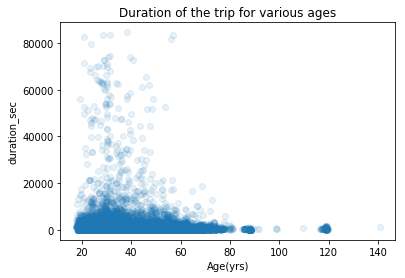

In [33]:
sb.regplot(data=df_bike,x='age',y='duration_sec',fit_reg=False,x_jitter=0.5,scatter_kws={'alpha':1/10});
plt.xlabel('Age(yrs)')
plt.title('Duration of the trip for various ages')


#### From the above scatter plot, though the average duration for most of the users at all ages remains same, we can conclude that as the age of the user increases the duration of the trip decreases.

### Plot between user type and member gender

Text(0.5,1,'A Bar Chart between gender and user type of the bike rides')

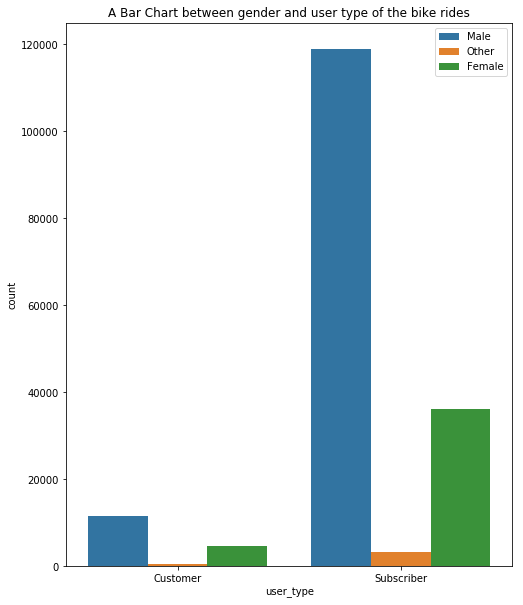

In [34]:
plt.figure(figsize=[8,10])
ax=sb.countplot(data=df_bike,x='user_type',hue='member_gender');
ax.legend(loc=1);
plt.title('A Bar Chart between gender and user type of the bike rides')


#### From the above clustered bar chart, there are more male riders on all days of the week followed by female riders and then others. Least  number of male and female riders are on weekends.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> We have five bivariate plots of which 3 are box plots, 1 is scatter plot and 1 is clustered bar chart. The duration of trip had a negative relation with age,in terms of gender:other>female>male,in terms of days:weekends>weakdays, in terms of user type:customer>subscriber.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most of the subscriber and customer type users are male riders followed by female riders. The number of riders are more in subscriber than in customer type users bu the duration of trip is exactly opposite as mentioned in the above answer.

## Multivariate Exploration


### Trip duration based on user type across all start days of week 

Text(0.5,1,'Trip duration based on user type across all start days of week ')

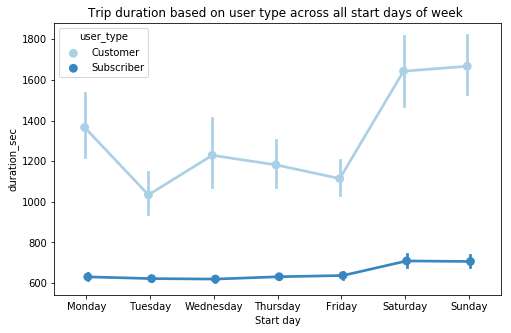

In [35]:
plt.figure(figsize=[8,5])
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sb.pointplot(data=df_bike,x='start_day',y='duration_sec',hue='user_type',palette='Blues',order=days_order,line_styles=" ",dodge=True);
plt.xlabel('Start day')
plt.title('Trip duration based on user type across all start days of week ')

####  Customers travel  longer distances on all days of the week whereas subscribers travel shorter distances.Both the user types travel more distances on weekends than on week days.

### Duration of trip for various ages across all start days of the week

Text(0.5,0.98,'Duration of trip for various ages across all start days of the week')

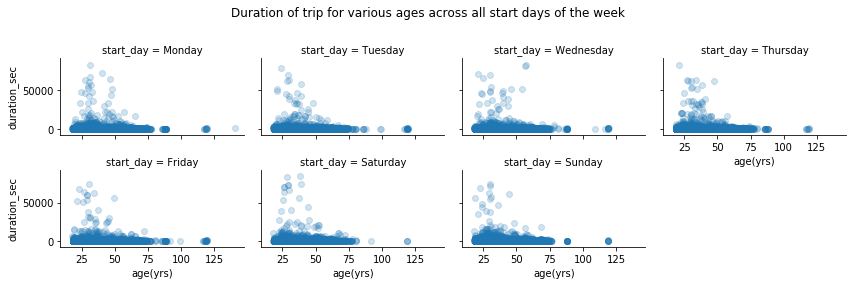

In [36]:
plt.figure(figsize=[15,8])
days_order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
g=sb.FacetGrid(data=df_bike,col='start_day',col_wrap=4,size=2,col_order=days_order,aspect=1.5);
g.map(sb.regplot,'age','duration_sec',x_jitter=0.4,fit_reg=False,scatter_kws={'alpha':1/5})
g.set_axis_labels(x_var='age(yrs)')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Duration of trip for various ages across all start days of the week')

#### The duration of the trip is highest for ages 25 to 50 yrs on all days of the week(higher on weeekends) with a flat notable decrease upto 75 yrs , beyond 80yrs the duration is very less on weekdays and negligible on weekends.

### Duration of trip for various ages across all genders

Text(0.5,0.98,'Duration of trip for various ages across all genders')

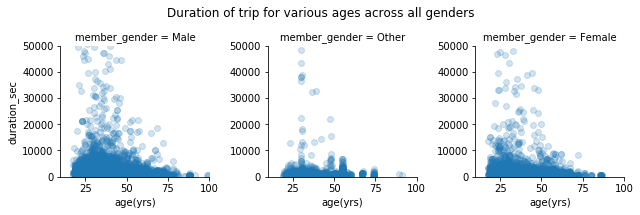

In [37]:
plt.figure(figsize=[20,8])
g=sb.FacetGrid(data=df_bike,col='member_gender',xlim=[10,100],ylim=[-100,50000]);
g.map(sb.regplot,'age','duration_sec',x_jitter=0.4,fit_reg=False,scatter_kws={'alpha':1/5})
g.set_axis_labels(x_var='age(yrs)')
g.fig.subplots_adjust(top=0.8)
g.fig.suptitle('Duration of trip for various ages across all genders')

#### The male riders between age 25 to 60 yrs are travelling longer distances followed by female riders and in others we can see that at the age of 60 yrs (>50yrs) there is an increase in duration of trip .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> From all of the above graphs,we can say that though the number of higher duration trips is more for male riders but time of duration is higher for women and others. Customers travel longer distances though the number of trips are only 10% of subscribers.

### Were there any interesting or surprising interactions between features?

> There is a second peak of highest duration of trip at higher age around 60yrs for others.

## Conclusions
1. The dataset contains data for months of February and March '19.

2. The average duration of the trip is 500sec.

3. Most number of the trips happened on weekends rather than on weekdays.

4. The 8th,9th,17th and 18th hours have the highest number of trips. The 3rd,4th trips have the least number of trips. This clearly tells there are high number of rides during the opening office hours and closing office hours.

5. Most of the bike rides are done by 20 to 40 years old people and they have got many outliers with the highest one being >140 years old.

6. The duration of trip had a negative relation with age.

7. The duration of trip in terms of gender:other>female>male.

8. The duration of trip in terms of days:weekends>weakdays.

9. The duration of trip in terms of user type:customer>subscriber.

## Insights
1. Though the number of higher duration trips is more for male riders but time of duration is higher for women and others. 
2. Customers travel longer distances though the number of trips are only 10% of subscribers.



In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Part_I_exploration_template.ipynb'])

0